In [1]:
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score

In [2]:
states = pd.read_csv('../Machine-Learning/state_poverty_and_income.csv')

In [3]:
states.columns

Index(['AREA', 'STATE', 'OCC_CODE', 'OCC_TITLE', 'OCC_GROUP', 'TOT_EMP',
       'EMP_PRSE', 'JOBS_1000', 'LOC_QUOTIENT', 'H_MEAN', 'A_MEAN',
       'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90',
       'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90', 'YEAR',
       'SAEMHI_MOE', 'SAEMHI_PT', 'SAEMHI_UB90', 'SAEPOV0_17_LB90',
       'SAEPOV0_17_MOE', 'SAEPOV0_17_PT', 'SAEPOV0_17_UB90', 'SAEPOV0_4_LB90',
       'SAEPOV0_4_MOE', 'SAEPOV0_4_PT', 'SAEPOV0_4_UB90', 'SAEPOV5_17R_LB90',
       'SAEPOV5_17R_MOE', 'SAEPOV5_17R_PT', 'SAEPOV5_17R_UB90',
       'SAEPOVALL_LB90', 'SAEPOVALL_MOE', 'SAEPOVALL_PT', 'SAEPOVALL_UB90',
       'SAEPOVRT0_17_LB90', 'SAEPOVRT0_17_MOE', 'SAEPOVRT0_17_PT',
       'SAEPOVRT0_17_UB90', 'SAEPOVRT0_4_LB90', 'SAEPOVRT0_4_MOE',
       'SAEPOVRT0_4_PT', 'SAEPOVRT0_4_UB90', 'SAEPOVRT5_17R_LB90',
       'SAEPOVRT5_17R_MOE', 'SAEPOVRT5_17R_PT', 'SAEPOVRT5_17R_UB90',
       'SAEPOVRTALL_LB90', 'SAEPOVRTALL_MOE', 'SAEPOVRTALL_PT',
       'SAEP

In [4]:
states = states[states['OCC_TITLE'] == 'All Occupations'].drop(columns = 'OCC_TITLE')

In [5]:
states = pd.get_dummies(states, columns = ['STATE'], drop_first = True)

In [6]:
states

,AREA,OCC_CODE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_QUOTIENT,H_MEAN,A_MEAN,MEAN_PRSE,...,STATE_South Dakota,STATE_Tennessee,STATE_Texas,STATE_Utah,STATE_Vermont,STATE_Virginia,STATE_Washington,STATE_West Virginia,STATE_Wisconsin,STATE_Wyoming
0,1,00-0000,total,1922570,0.4,1000.0,1.0,20.76,43170.0,0.5,...,0,0,0,0,0,0,0,0,0,0
638,2,00-0000,total,318170,0.9,1000.0,1.0,27.77,57750.0,0.7,...,0,0,0,0,0,0,0,0,0,0
1112,4,00-0000,total,2704050,0.5,1000.0,1.0,23.15,48160.0,0.7,...,0,0,0,0,0,0,0,0,0,0
1764,5,00-0000,total,1200130,0.7,1000.0,1.0,19.49,40530.0,1.5,...,0,0,0,0,0,0,0,0,0,0
2364,6,00-0000,total,16695010,0.2,1000.0,1.0,27.50,57190.0,0.4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146471,51,00-0000,total,3753230,0.0,1000.0,1.0,29.97,62330.0,0.3,...,0,0,0,0,0,1,0,0,0,0
147131,53,00-0000,total,3205930,0.0,1000.0,1.0,33.05,68740.0,0.4,...,0,0,0,0,0,0,1,0,0,0
147786,54,00-0000,total,657680,0.0,1000.0,1.0,22.35,46490.0,0.3,...,0,0,0,0,0,0,0,1,0,0
148360,55,00-0000,total,2754870,0.0,1000.0,1.0,25.54,53120.0,0.2,...,0,0,0,0,0,0,0,0,1,0


In [7]:
target = 'SAEPOVRTALL_PT'
X = states.drop([target], axis=1)
y = states[target]
X = X.select_dtypes(exclude=['object'])

In [8]:
# states.columns[50:109]

### Feature selection:

In [9]:
features = ['TOT_EMP', 'JOBS_1000']
features2 = ['TOT_EMP', 'JOBS_1000', 'A_PCT90']
features3 = ['AREA', 'JOBS_1000', 'A_PCT75']
features4 = ['AREA', 'TOT_EMP', 'JOBS_1000', 'LOC_QUOTIENT']
features5 = ['AREA', 'TOT_EMP', 'JOBS_1000', 'A_PCT75', 'LOC_QUOTIENT']
features6 = ['AREA', 'JOBS_1000', 'A_MEAN', 'A_MEDIAN', 'A_PCT75']
features7 = ['AREA', 'JOBS_1000', 'A_MEAN', 'A_MEDIAN', 'A_PCT75', 'LOC_QUOTIENT']
features8 = ['AREA', 'JOBS_1000', 'A_MEAN', 'A_MEDIAN', 'A_PCT75', 'LOC_QUOTIENT', 
             'H_MEAN', 'A_MEAN', 'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN', 
             'H_PCT75', 'H_PCT90', 'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 
             'A_PCT90']
features9 = ['STATE_Alaska','STATE_Arizona', 'STATE_Arkansas', 'STATE_California', 'STATE_Colorado',
'STATE_Connecticut', 'STATE_Delaware', 'STATE_Florida', 'STATE_Georgia',
'STATE_Hawaii', 'STATE_Idaho', 'STATE_Illinois', 'STATE_Indiana',
'STATE_Iowa', 'STATE_Kansas', 'STATE_Kentucky', 'STATE_Louisiana',
'STATE_Maine', 'STATE_Maryland', 'STATE_Massachusetts',
'STATE_Michigan', 'STATE_Minnesota', 'STATE_Mississippi',
'STATE_Missouri', 'STATE_Montana', 'STATE_Nebraska', 'STATE_Nevada',
'STATE_New Hampshire', 'STATE_New Jersey', 'STATE_New Mexico',
'STATE_New York', 'STATE_North Carolina', 'STATE_North Dakota',
'STATE_Ohio', 'STATE_Oklahoma', 'STATE_Oregon', 'STATE_Pennsylvania',
'STATE_Rhode Island', 'STATE_South Carolina', 'STATE_South Dakota',
'STATE_Tennessee', 'STATE_Texas', 'STATE_Utah', 'STATE_Vermont',
'STATE_Virginia', 'STATE_Washington', 'STATE_West Virginia',
'STATE_Wisconsin', 'STATE_Wyoming']
features10 = ['TOT_EMP'] + features9
features11 = ['JOBS_1000'] + features9
features12 = ['LOC_QUOTIENT'] + features9
features13 = ['LOC_QUOTIENT', 'JOBS_1000'] + features9
features14 = ['LOC_QUOTIENT', 'TOT_EMP'] + features9
features15 = ['JOBS_1000', 'TOT_EMP'] + features9


features_list = [features9, features10,
                 features11, features12, features13, features14, features15]

for x, features in enumerate(features_list):
    X = states[features]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(n_estimators=1000, random_state=101, oob_score=True)
    model.fit(X_train, y_train)
    score= model.score(X_train, y_train)
    score_val = model.score(X_test, y_test)
    print(f'features: {features}')
    print(f'           score: {score}')
    print(f'       score_val: {score_val}')
    y_pred = model.predict(X_test)
    # print(f'             MAE: {mean_absolute_error(y_test, y_pred)}')
    # print(f'             MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'Out-of-Bag Score: {model.oob_score_}')

features: ['STATE_Alaska', 'STATE_Arizona', 'STATE_Arkansas', 'STATE_California', 'STATE_Colorado', 'STATE_Connecticut', 'STATE_Delaware', 'STATE_Florida', 'STATE_Georgia', 'STATE_Hawaii', 'STATE_Idaho', 'STATE_Illinois', 'STATE_Indiana', 'STATE_Iowa', 'STATE_Kansas', 'STATE_Kentucky', 'STATE_Louisiana', 'STATE_Maine', 'STATE_Maryland', 'STATE_Massachusetts', 'STATE_Michigan', 'STATE_Minnesota', 'STATE_Mississippi', 'STATE_Missouri', 'STATE_Montana', 'STATE_Nebraska', 'STATE_Nevada', 'STATE_New Hampshire', 'STATE_New Jersey', 'STATE_New Mexico', 'STATE_New York', 'STATE_North Carolina', 'STATE_North Dakota', 'STATE_Ohio', 'STATE_Oklahoma', 'STATE_Oregon', 'STATE_Pennsylvania', 'STATE_Rhode Island', 'STATE_South Carolina', 'STATE_South Dakota', 'STATE_Tennessee', 'STATE_Texas', 'STATE_Utah', 'STATE_Vermont', 'STATE_Virginia', 'STATE_Washington', 'STATE_West Virginia', 'STATE_Wisconsin', 'STATE_Wyoming']
           score: 0.9491499131658414
       score_val: 0.9312472656594908
Out-of-Bag

### Final model

In [10]:
features = ['TOT_EMP', 'JOBS_1000', 'LOC_QUOTIENT', 'STATE_Alaska','STATE_Arizona', 'STATE_Arkansas', 'STATE_California', 'STATE_Colorado',
'STATE_Connecticut', 'STATE_Delaware', 'STATE_Florida', 'STATE_Georgia',
'STATE_Hawaii', 'STATE_Idaho', 'STATE_Illinois', 'STATE_Indiana',
'STATE_Iowa', 'STATE_Kansas', 'STATE_Kentucky', 'STATE_Louisiana',
'STATE_Maine', 'STATE_Maryland', 'STATE_Massachusetts',
'STATE_Michigan', 'STATE_Minnesota', 'STATE_Mississippi',
'STATE_Missouri', 'STATE_Montana', 'STATE_Nebraska', 'STATE_Nevada',
'STATE_New Hampshire', 'STATE_New Jersey', 'STATE_New Mexico',
'STATE_New York', 'STATE_North Carolina', 'STATE_North Dakota',
'STATE_Ohio', 'STATE_Oklahoma', 'STATE_Oregon', 'STATE_Pennsylvania',
'STATE_Rhode Island', 'STATE_South Carolina', 'STATE_South Dakota',
'STATE_Tennessee', 'STATE_Texas', 'STATE_Utah', 'STATE_Vermont',
'STATE_Virginia', 'STATE_Washington', 'STATE_West Virginia',
'STATE_Wisconsin', 'STATE_Wyoming']
X = states[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=1000, random_state=0, oob_score=True)
model.fit(X_train, y_train)
score= model.score(X_train, y_train)
score_val = model.score(X_test, y_test)
print(f'           score: {score}')
print(f'       score_val: {score_val}')
y_pred = model.predict(X_test)
print(f'             MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'             MSE: {mean_squared_error(y_test, y_pred)}')
print(f'Out-of-Bag Score: {model.oob_score_}')

           score: 0.9838395305799811
       score_val: 0.9182154766969335
             MAE: 0.6503719999999822
             MSE: 0.6613214323999519
Out-of-Bag Score: 0.8794249872049564


We chose to use these features for our model becuase, although it doesn't have as high of an R squared score, it has by far the best Out-of-bag score (ie highest cross validation accuracy). Other models may have had higher R squared but they had low out-of-box score meaning they were overfitting on the training data.

### Predicted VS Actual Results

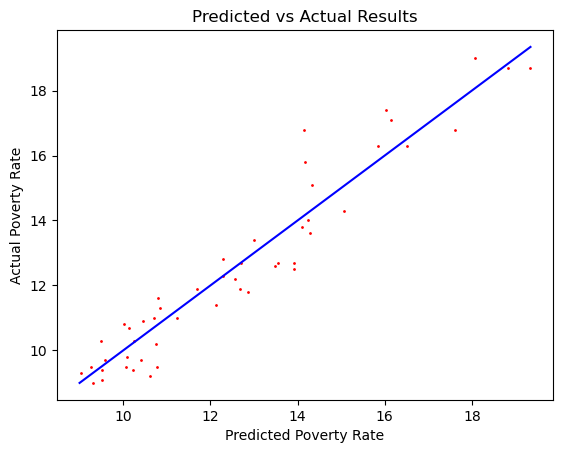

In [11]:
plt.scatter(y_pred, y_test, color = 'red', s=1)
plt.title('Predicted vs Actual Results')
plt.xlabel('Predicted Poverty Rate')
plt.ylabel('Actual Poverty Rate')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1,p2], [p1,p2], 'b-')

plt.show()

### Save model as pickle

In [12]:
filename = "../Machine-Learning/viking_model.pickle"

# File too large to push to git
# pickle.dump(model, open(filename, "wb"))


In [13]:
# loaded_model = pickle.load(open(filename, "rb"))